In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score


In [2]:
df=pd.read_csv('Term deposit/bank.csv')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
df.duplicated().sum()


0

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [8]:
df['deposit'].value_counts()/df.shape[0]

deposit
no     0.52616
yes    0.47384
Name: count, dtype: float64

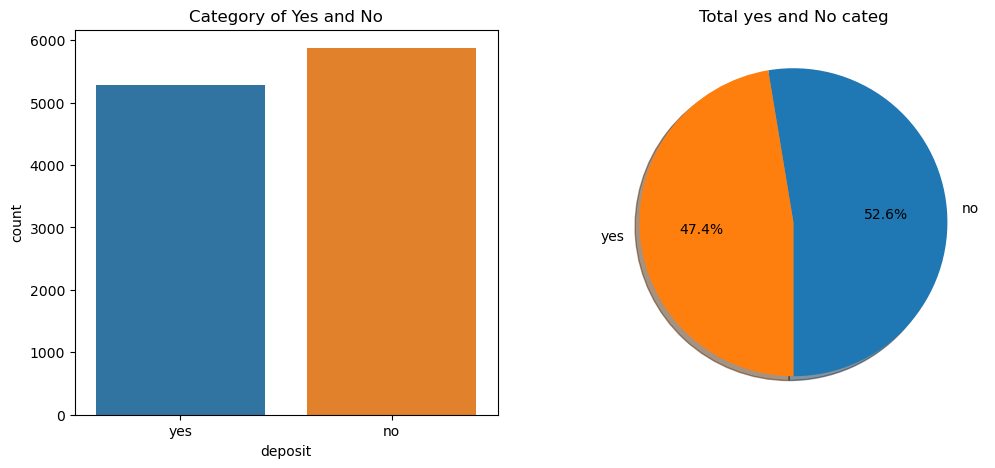

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='deposit',data=df)
plt.title("Category of Yes and No")
plt.subplot(1,2,2)
labels =df['deposit'].value_counts(sort = True).index
sizes = df['deposit'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Total yes and No categ',size = 12)
plt.show()

In [10]:
df_cat = df.select_dtypes(include='object').columns.drop(["deposit"])
df_cat

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

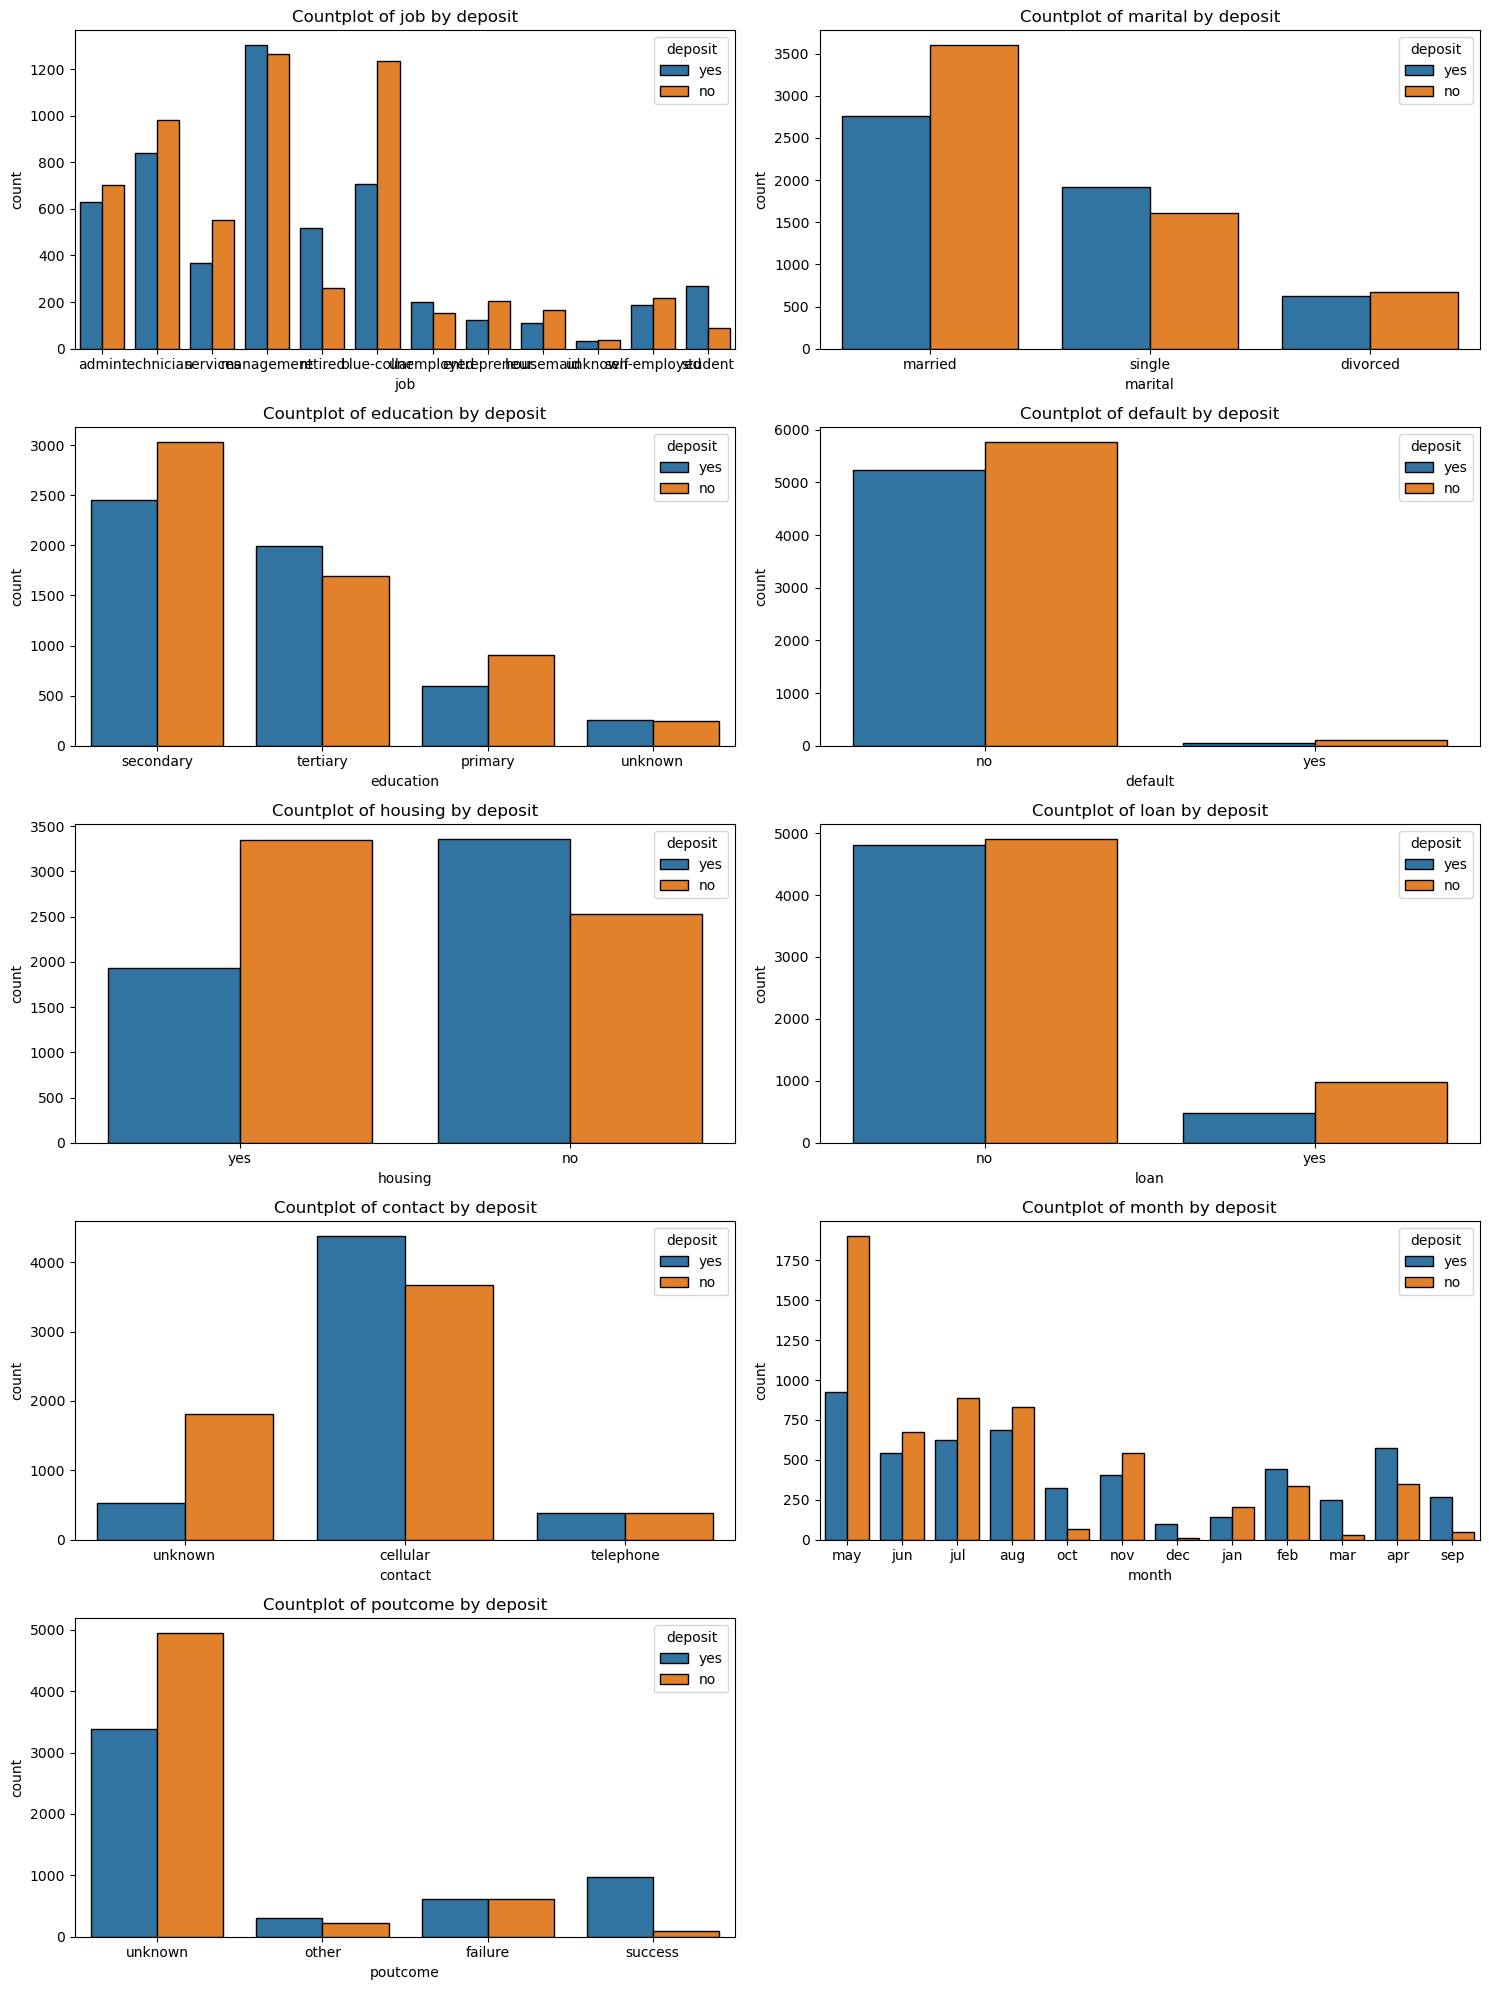

In [11]:
plt.figure(figsize=(15, 20))
num_features = min(len(df_cat), 9) 
for i, cat_fea in enumerate(df_cat[:num_features]):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=cat_fea, hue='deposit', data=df, edgecolor="black")
    plt.title("Countplot of {} by deposit".format(cat_fea))
plt.tight_layout()    
plt.show()

In [12]:
# Removing negative balance records
df = df[df['balance'] >= 0]

# Get the count of records
count_after_removal = df.shape[0]
print("Count after removing negative balance records:", count_after_removal)

Count after removing negative balance records: 10474


In [13]:
#Dropping column pdays because most of it has value '-1' which means person is invoved first time in a campaign
df.drop("pdays",inplace=True,axis=1)

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


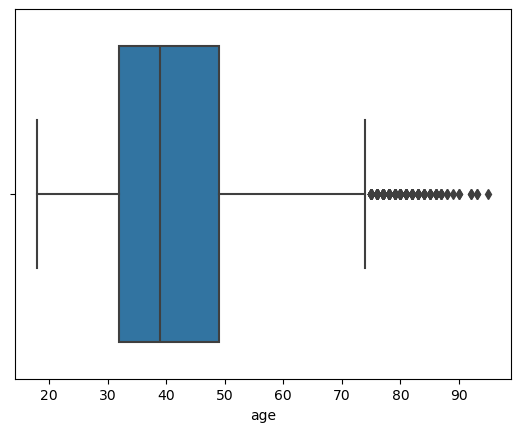

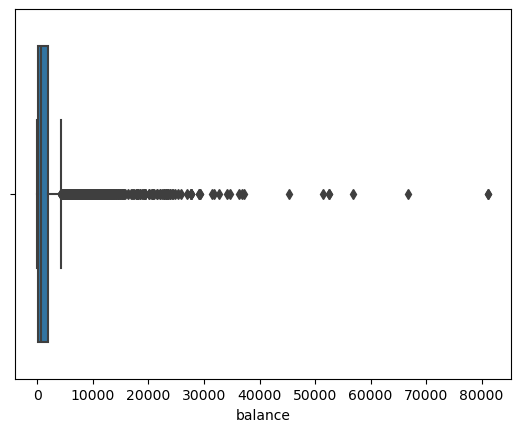

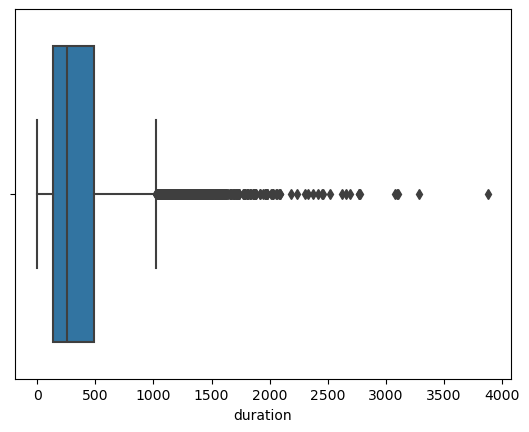

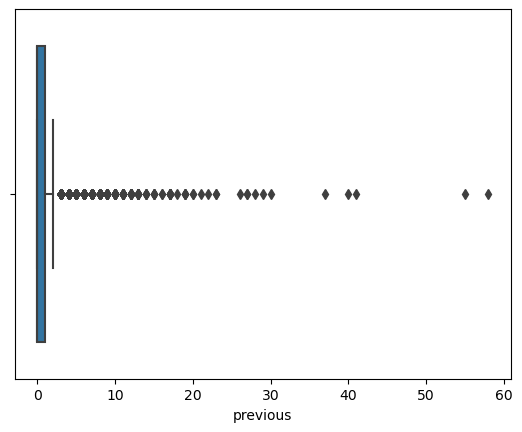

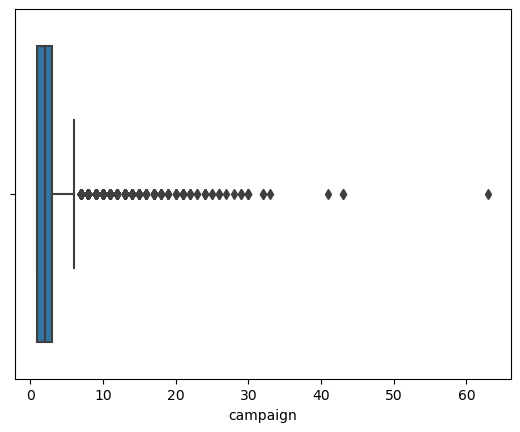

In [14]:
# Identify Categorical features
cat_features = ['education','job','default', 'housing', 'loan', 'contact', 'month', 'day','poutcome','marital']
# Identify Numeric features
numeric_features = ['age','balance','duration','previous','campaign']


for c in df[numeric_features]:
    plt.figure()
    sns.boxplot(x = c, data= df, orient = "v")

In [15]:
temp_columns = ["age", "balance", "duration", "previous","campaign"]
temp = 1.5

for column in temp_columns:
    print("Column:", column)
    
    # Calculate upper and lower quartiles
    Q1 = df[column].quantile(0.15)
    Q3 = df[column].quantile(0.85)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Calculate upper and lower limits
    upper_limit = Q3 + (temp * IQR)
    lower_limit = Q1 - (temp * IQR)
    
    print("Upper Limit:", upper_limit, "Lower Limit:", lower_limit)
    
    # Identify outliers
    outliers_upper = df[df[column] > upper_limit]
    outliers_lower = df[df[column] < lower_limit]
    
    # Calculate number of outliers filtered
    num_outliers_filtered = outliers_upper.shape[0] + outliers_lower.shape[0]
    proportion_outliers_filtered = num_outliers_filtered / df.shape[0] * 100
    
    print("Number of outliers above upper limit:", outliers_upper.shape[0])
    print("Number of outliers below lower limit:", outliers_lower.shape[0])
    
    # Replace outliers with upper and lower limits
    df.loc[df[column] > upper_limit, column] = upper_limit
    df.loc[df[column] < lower_limit, column] = lower_limit
    
    print("After replacing outliers:")
    print("Number of values above upper limit:", df[df[column] > upper_limit].shape[0])
    print("Number of values below lower limit:", df[df[column] < lower_limit].shape[0])
    
    print("Number of outliers filtered:", num_outliers_filtered)
    print("Proportion of outliers filtered (%):", proportion_outliers_filtered)
    print("--------------------------------------")

Column: age
Upper Limit: 92.5 Lower Limit: -7.5
Number of outliers above upper limit: 3
Number of outliers below lower limit: 0
After replacing outliers:
Number of values above upper limit: 0
Number of values below lower limit: 0
Number of outliers filtered: 3
Proportion of outliers filtered (%): 0.028642352491884668
--------------------------------------
Column: balance
Upper Limit: 7465.0 Lower Limit: -4375.0
Number of outliers above upper limit: 398
Number of outliers below lower limit: 0
After replacing outliers:
Number of values above upper limit: 0
Number of values below lower limit: 0
Number of outliers filtered: 398
Proportion of outliers filtered (%): 3.7998854305900323
--------------------------------------
Column: duration
Upper Limit: 1561.6249999999982 Lower Limit: -778.5749999999989
Number of outliers above upper limit: 111
Number of outliers below lower limit: 0
After replacing outliers:
Number of values above upper limit: 0
Number of values below lower limit: 0
Number o

C:\Users\User\AppData\Local\Temp\ipykernel_24560\2032029527.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '92.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[column] > upper_limit, column] = upper_limit
C:\Users\User\AppData\Local\Temp\ipykernel_24560\2032029527.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1561.6249999999982' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[column] > upper_limit, column] = upper_limit
C:\Users\User\AppData\Local\Temp\ipykernel_24560\2032029527.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.l

In [16]:

dic = {"yes":1,"no":0}
clst = ["deposit","loan","default","housing"]
for i in clst:
    df[i] = df[i].map(dic)

In [17]:
# OneHot Encoding 
df = pd.get_dummies(df, columns = ['job','marital','education'],drop_first=False)

In [18]:
df=df.reset_index()
df.drop('index',axis=1,inplace=True)

In [19]:
# Define categorical columns
ob=df.select_dtypes(include=["object","bool"]).columns

# Apply label encoding
label_encoder = LabelEncoder()
for col in ob:
    df[col] = label_encoder.fit_transform(df[col])

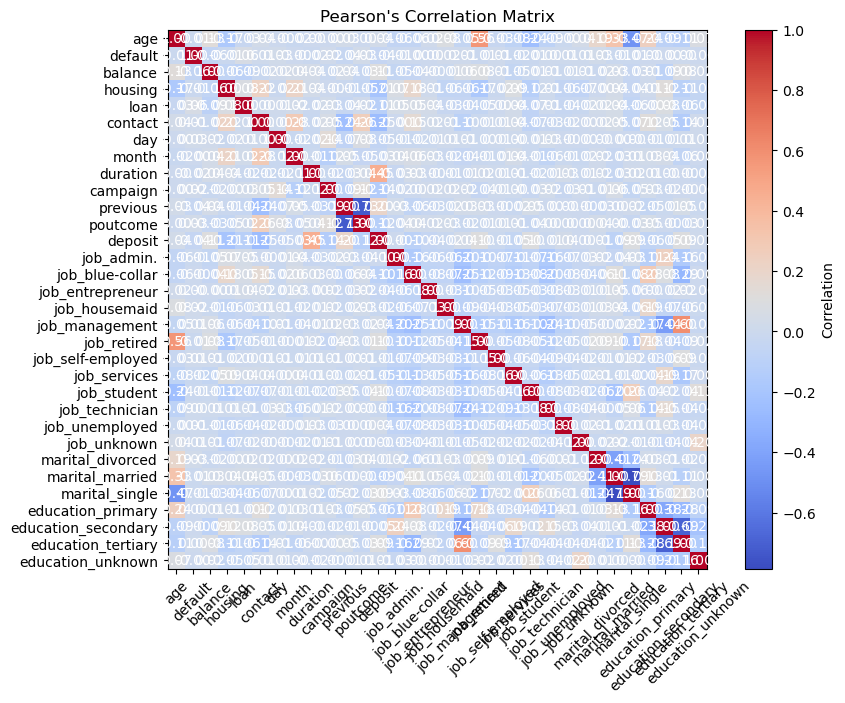

In [20]:
# Calculate Pearson's correlation coefficients
correlation_matrix = df.corr()

# Plot correlation matrix with annotations
plt.figure(figsize=(10, 7))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Add annotations for correlation values
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, "{:.2f}".format(correlation_matrix.iloc[i, j]), ha='center', va='center', color='white')

plt.colorbar(label='Correlation')
plt.title("Pearson's Correlation Matrix")
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()

In [21]:
df=df.astype(int)

In [22]:
df.describe()

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
count,10474.000000,10474.000000,10474.000000,10474.000000,10474.000000,10474.000000,10474.000000,10474.000000,10474.000000,10474.000000,...,10474.000000,10474.000000,10474.000000,10474.000000,10474.000000,10474.000000,10474.000000,10474.000000,10474.000000,10474.000000
mean,41.342181,0.008593,1419.756445,0.455604,0.118484,0.474508,15.637197,5.410827,367.118484,2.322226,...,0.163643,0.032748,0.006683,0.112373,0.569601,0.318026,0.131086,0.485106,0.337884,0.045923
std,12.043119,0.092302,1879.910549,0.498049,0.323196,0.807778,8.420563,3.227508,325.727165,1.776210,...,0.369969,0.177984,0.081481,0.315840,0.495156,0.465732,0.337511,0.499802,0.473011,0.209329
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,183.250000,0.000000,0.000000,0.000000,8.000000,3.000000,139.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,625.000000,0.000000,0.000000,0.000000,15.000000,6.000000,256.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,0.000000,1840.750000,1.000000,0.000000,1.000000,22.000000,8.000000,492.750000,3.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,92.000000,1.000000,7465.000000,1.000000,1.000000,2.000000,31.000000,11.000000,1561.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
file_path = "termDepositCleaned.csv"

# Save the DataFrame to a CSV file
#df.to_csv(file_path, index=False)

In [24]:
X = df.drop('deposit',axis=1)
Y = df['deposit']

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
X = scaler.fit_transform(X)


In [26]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape , X_test.shape)

(7331, 31) (3143, 31)


In [27]:
#Random Forest 

In [28]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters found by grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy of Random Forest:", accuracy)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Testing Accuracy of Random Forest: 0.8418708240534521


In [42]:
# Define the best hyperparameters
best_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

# Create a Random Forest classifier with the best hyperparameters
rf_model = RandomForestClassifier(**best_params)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy of Random Forest with best hyperparameters:", accuracy)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Compute ROC curve and AUC score
y_scores = final_knn_model.predict_proba(X_test)[:, 1]  # Probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
print("ROC AUC Score:", roc_auc)


Testing Accuracy of Random Forest with best hyperparameters: 0.844097995545657
Confusion Matrix:
[[1323  286]
 [ 204 1330]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1609
           1       0.82      0.87      0.84      1534

    accuracy                           0.84      3143
   macro avg       0.84      0.84      0.84      3143
weighted avg       0.85      0.84      0.84      3143

ROC AUC Score: 0.7720625831069207


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform'],
    'metric': ['euclidean']
}

# Create an instance of the KNN classifier
knn = KNeighborsClassifier()

# Instantiate GridSearchCV with the KNN classifier and parameter grid
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final KNN model with the best hyperparameters
final_knn_model = KNeighborsClassifier(**best_params)
final_knn_model.fit(X_train, y_train)

# Evaluate the final KNN model on the test data
final_accuracy = final_knn_model.score(X_test, y_test)
print("Final Testing Accuracy of KNN:", final_accuracy)



Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Final Testing Accuracy of KNN: 0.7018771874005727


In [41]:
# Load the data and split into train and test sets
# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined

# Define the best hyperparameters
best_params = {'metric': 'euclidean','n_neighbors': 9,'weights': 'uniform'}

# Create a kNN classifier with the best hyperparameters
knn_model = KNeighborsClassifier(**best_params)

# Fit the model to the scaled training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy of kNN with best hyperparameters:", accuracy)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Compute ROC curve and AUC score
y_scores = final_knn_model.predict_proba(X_test)[:, 1]  # Probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)
print("ROC AUC Score:", roc_auc)


Testing Accuracy of kNN with best hyperparameters: 0.7018771874005727
Confusion Matrix:
[[1214  395]
 [ 542  992]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1609
           1       0.72      0.65      0.68      1534

    accuracy                           0.70      3143
   macro avg       0.70      0.70      0.70      3143
weighted avg       0.70      0.70      0.70      3143

ROC AUC Score: 0.7720625831069207
